In [7]:
#Original code based on https://github.com/karimbahgat/Pytess/blob/master/__private__/old_drafts/voronoi_test.py
from PIL import Image
import random
import math
 
def generate_voronoi_diagram(width, height, num_cells):
    image = Image.new("RGB", (width, height))
    putpixel = image.putpixel
    imgx, imgy = image.size
    nx = []
    ny = []
    nr = []
    ng = []
    nb = []
    for i in range(num_cells):
        nx.append(random.randrange(imgx))
        ny.append(random.randrange(imgy))
        nr.append(random.randrange(256))
        ng.append(random.randrange(256))
        nb.append(random.randrange(256))
    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            putpixel((x, y), (nr[j], ng[j], nb[j]))
    image.save("VoronoiDiagram.png", "PNG")
    image.show()
 
generate_voronoi_diagram(500, 500, 25)

In [72]:
%matplotlib inline
import numpy as np

import random
import math
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

 
def generate_voronoi_diagram(width, height, num_cells):
    
    image = np.zeros(shape=(width,height,3))
    imgx, imgy, imgz = image.shape
    nx = []
    ny = []
    nr = []
    ng = []
    nb = []
    #Creates a synthetic set of points
    for i in range(num_cells):
        nx.append(random.randrange(imgx))
        ny.append(random.randrange(imgy))
        nr.append(random.randrange(256))
        ng.append(random.randrange(256))
        nb.append(random.randrange(256))
        
    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            image[x,y] = nr[j], ng[j], nb[j]  
    #plt.imshow(image)

    
    return image

In [73]:
def vizOutcomeSimulation(num_cells):
    image = generate_voronoi_diagram(500, 500, num_cells)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.set_title('Sharing Y axis')
    ax2.hist(image.ravel(), bins=num_cells)
    ax2.set_title('Histogram')
    y, x, _ = plt.hist(image.ravel(), bins=num_cells)
    # featv = extrf()
    mylabel = '[min, max, std]:',y.min(),y.max(), y.std()
    red_patch = mpatches.Patch(color='green', label=mylabel)
    plt.legend(handles=[red_patch])
    plt.show()    

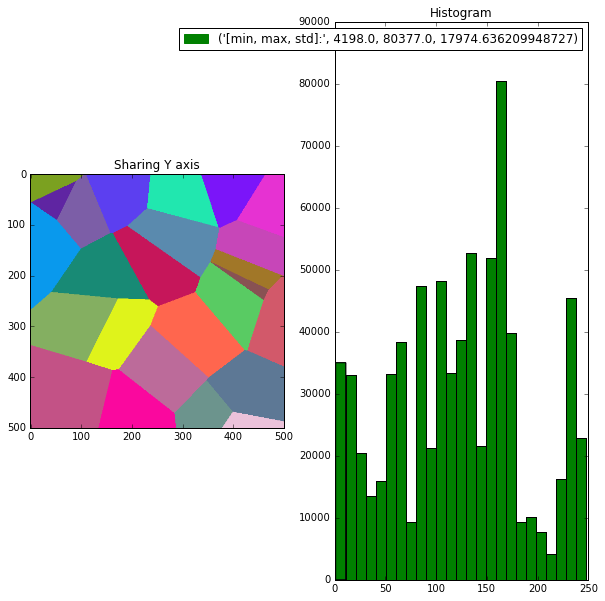

In [74]:
num_cells = 25
vizOutcomeSimulation(num_cells)

In [122]:
num_cells = 5
image = generate_voronoi_diagram(500, 500,10)
from skimage import  io, morphology, img_as_ubyte, feature, exposure, filters, util
from skimage.measure import label, regionprops
from skimage.color import rgb2gray

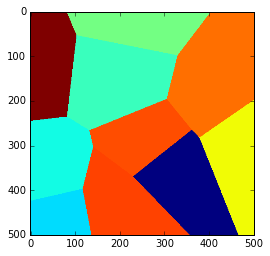

In [123]:
image2 = rgb2gray(image)
ilabel = label(image2)
regions = regionprops(ilabel) #notice that you need to also 
plt.imshow(image2)

In [124]:
print('You have', len(regions), 'regions')

You have 10 regions


In [125]:
#Print all the properties for a region
for p in regions[0]:
    print(p)

area
bbox
centroid
convex_area
convex_image
coords
eccentricity
equivalent_diameter
euler_number
extent
filled_area
filled_image
image
label
major_axis_length
minor_axis_length
moments
moments_central
moments_hu
moments_normalized
orientation
perimeter
solidity


In [139]:
#with open("file.txt", 'w') as f:
#    for s in regions:
#        f.write(str(s.area) + str() '\n')

In [144]:
table = [];
for i in range(len(regions)):
    all_props = {p:regions[i][p] for p in regions[i] if p not in ('image','convex_image','filled_image')}
    for p, v in list(all_props.items()):
        if isinstance(v,np.ndarray):
            if(len(v.shape)>1):
                del all_props[p]

    for p, v in list(all_props.items()):
        try:
            L = len(v)
        except:
            L = 1
        if L>1:
            del all_props[p]
            for n,entry in enumerate(v):
                all_props[p + str(n)] = entry

    k = ", ".join(all_props.keys())
    v = ", ".join([str(f) for f in all_props.values()]) #notice you need to convert numbers to strings
    if(i==0):
        with open('voroProps.csv','w') as f:
                #f.write(k)
                f.writelines([k,'\n',v,'\n'])       
    else:
        with open('voroProps.csv','a') as f:
            #f.write(k)
            f.writelines([v,'\n'])         
                